In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv('dataset.csv')  # Replace 'dataset.csv' with your file path
df['label'] = (df['danceability'] > 0.5).astype(int)

# Specify features and true labels
features = ['danceability', 'energy', 'tempo', 'loudness', 'valence']  # Example feature list
X = df[features]
y_true = df['label']  # Replace 'label' with the actual column containing true labels

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Fit K-Means on the original data
optimal_k = 4  # Set based on previous Elbow method analysis
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
y_pred = kmeans.labels_

# Step 4: Map predicted clusters to true labels
def map_clusters_to_labels(y_true, y_pred):
    mapping = {}
    for cluster in np.unique(y_pred):
        cluster_labels = y_true[y_pred == cluster]
        mapping[cluster] = cluster_labels.mode()[0]  # Most common true label
    return np.array([mapping[cluster] for cluster in y_pred])

y_mapped = map_clusters_to_labels(y_true, y_pred)

Accuracy Before PCA: 0.76
Metrics Before PCA:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65     37577
           1       0.84      0.80      0.82     76423

    accuracy                           0.76    114000
   macro avg       0.73      0.74      0.73    114000
weighted avg       0.77      0.76      0.76    114000

Confusion Matrix Before PCA:
 [[25538 12039]
 [15357 61066]]


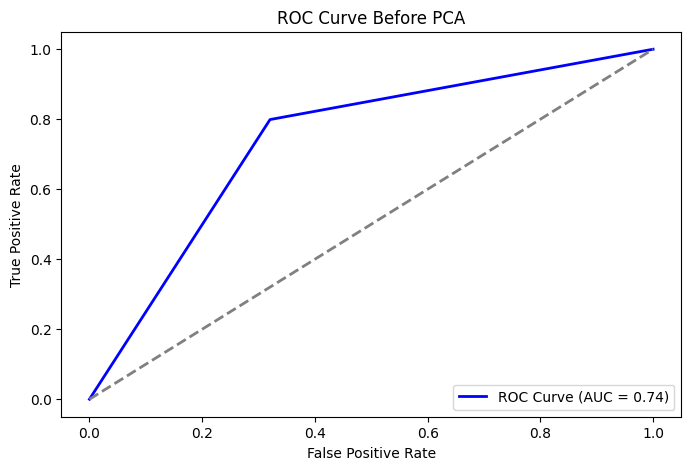

In [ ]:
# --- Metrics and Accuracy Before PCA/t-SNE ---
accuracy_before = accuracy_score(y_true, y_mapped)
print(f"Accuracy Before PCA: {accuracy_before:.2f}")
print("Metrics Before PCA:")
print(classification_report(y_true, y_mapped))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_mapped)
print("Confusion Matrix Before PCA:\n", conf_matrix)

# Plot ROC and AUC (if binary classification)
fpr, tpr, _ = roc_curve(y_true, y_mapped)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title("ROC Curve Before PCA")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

---- After PCA ----
Accuracy After PCA: 0.80
Metrics After PCA:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72     37577
           1       0.88      0.82      0.85     76423

    accuracy                           0.80    114000
   macro avg       0.78      0.79      0.78    114000
weighted avg       0.81      0.80      0.81    114000

Confusion Matrix After PCA:
 [[28923  8654]
 [13818 62605]]


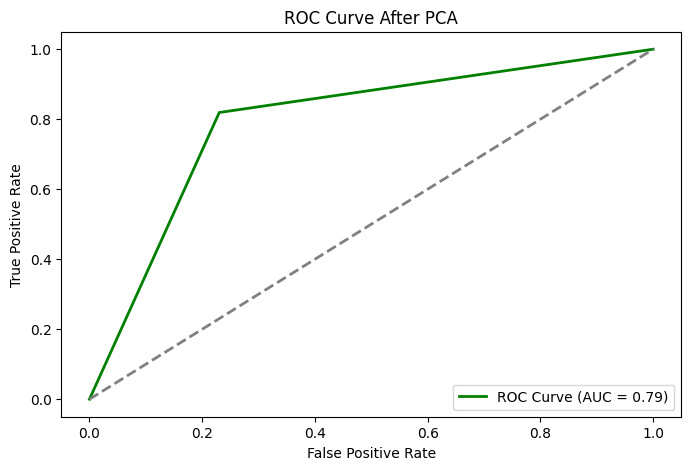

In [ ]:
# 2. Metrics and Accuracy After PCA
print("---- After PCA ----")
# Apply PCA and re-fit K-Means
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.labels_
y_mapped_pca = map_clusters_to_labels(y_true, y_pred_pca)

# Evaluate after PCA
accuracy_pca = accuracy_score(y_true, y_mapped_pca)
print(f"Accuracy After PCA: {accuracy_pca:.2f}")
print("Metrics After PCA:")
print(classification_report(y_true, y_mapped_pca))

# Confusion matrix after PCA
conf_matrix_pca = confusion_matrix(y_true, y_mapped_pca)
print("Confusion Matrix After PCA:\n", conf_matrix_pca)

# Plot ROC and AUC after PCA
fpr_pca, tpr_pca, _ = roc_curve(y_true, y_mapped_pca)
roc_auc_pca = auc(fpr_pca, tpr_pca)

plt.figure(figsize=(8, 5))
plt.plot(fpr_pca, tpr_pca, color='green', lw=2, label=f"ROC Curve (AUC = {roc_auc_pca:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title("ROC Curve After PCA")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

---- After Optimized t-SNE ----


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Accuracy After Optimized t-SNE: 0.75
Metrics After Optimized t-SNE:
              precision    recall  f1-score   support

           0       0.66      0.49      0.56     37577
           1       0.78      0.87      0.82     76423

    accuracy                           0.75    114000
   macro avg       0.72      0.68      0.69    114000
weighted avg       0.74      0.75      0.74    114000

Confusion Matrix After Optimized t-SNE:
 [[18476 19101]
 [ 9691 66732]]


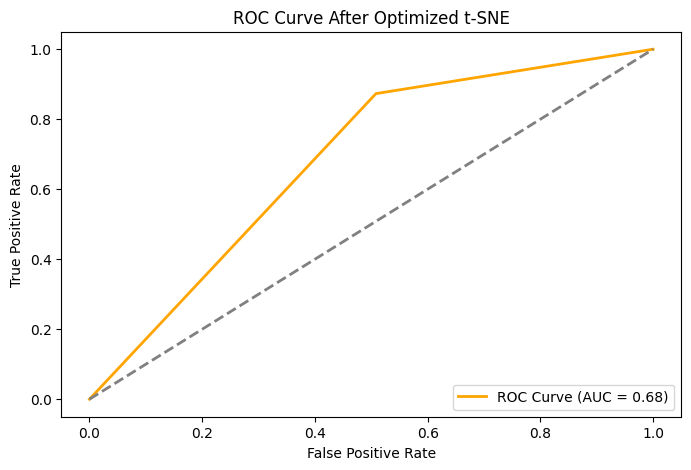

In [ ]:
# 3. Metrics and Accuracy After Optimized t-SNE (For Small Datasets)
print("---- After Optimized t-SNE ----")

tsne = TSNE(
    n_components=2,       # Retain 2D for visualization and clustering
    random_state=42,
    perplexity=5,         # Lower perplexity for small datasets
    n_iter=1000,          # Increase iterations for better convergence
    method='barnes_hut',  # Faster computation
    learning_rate=100     # Optimized learning rate for smooth embeddings
)
X_tsne = tsne.fit_transform(X_scaled)

# Re-fit K-Means on the t-SNE-transformed data
kmeans_tsne = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_tsne.fit(X_tsne)
y_pred_tsne = kmeans_tsne.labels_

# Map clusters to true labels
y_mapped_tsne = map_clusters_to_labels(y_true, y_pred_tsne)

# Evaluate after t-SNE
accuracy_tsne = accuracy_score(y_true, y_mapped_tsne)
print(f"Accuracy After Optimized t-SNE: {accuracy_tsne:.2f}")
print("Metrics After Optimized t-SNE:")
print(classification_report(y_true, y_mapped_tsne))

# Confusion matrix after t-SNE
conf_matrix_tsne = confusion_matrix(y_true, y_mapped_tsne)
print("Confusion Matrix After Optimized t-SNE:\n", conf_matrix_tsne)

# Plot ROC and AUC after t-SNE
fpr_tsne, tpr_tsne, _ = roc_curve(y_true, y_mapped_tsne)
roc_auc_tsne = auc(fpr_tsne, tpr_tsne)

# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr_tsne, tpr_tsne, color='orange', lw=2, label=f"ROC Curve (AUC = {roc_auc_tsne:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title("ROC Curve After Optimized t-SNE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()